In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score


In [90]:
# Manually type the file path (don't copy-paste)
dataset = pd.read_csv(r'E:\Machine Learning Projects\spam email detection\spam_ham_dataset.csv')



In [92]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [94]:
dataset.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [96]:
dataset.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [98]:
dataset.describe(include='all')

,Unnamed: 0,label,text,label_num
count,5171.000000,5171,5171,5171.000000
unique,NaN,2,4993,NaN
top,NaN,ham,Subject: calpine daily gas nomination\r\n>\r\n...,NaN
freq,NaN,3672,20,NaN
mean,2585.000000,NaN,NaN,0.289886
std,1492.883452,NaN,NaN,0.453753
min,0.000000,NaN,NaN,0.000000
25%,1292.500000,NaN,NaN,0.000000
50%,2585.000000,NaN,NaN,0.000000
75%,3877.500000,NaN,NaN,1.000000


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [102]:
dataset.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [104]:
dataset.shape

(5171, 4)

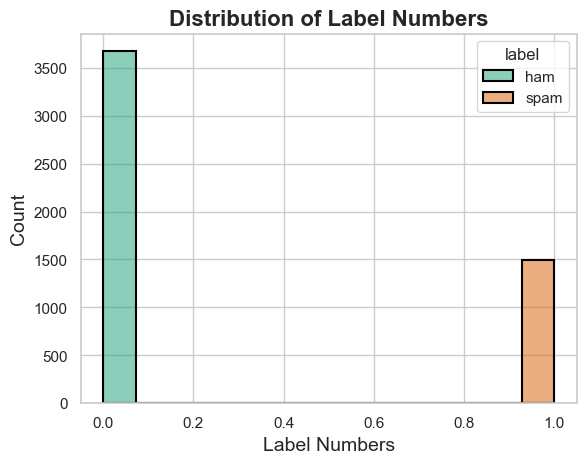

In [106]:
import matplotlib.pyplot as plt  # Make sure to import matplotlib.pyplot if not already imported
import seaborn as sns

# Set the overall aesthetic of the plots
sns.set(style="whitegrid")  # Professional style with grid

# Use the 'Dark2' palette for professional color tones
sns.histplot(data=dataset, x="label_num", hue="label", palette="Dark2", edgecolor="black", linewidth=1.5)

# Adjust the title and axis labels using plt (from matplotlib)
plt.title("Distribution of Label Numbers", fontsize=16, fontweight='bold')
plt.xlabel("Label Numbers", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.show()


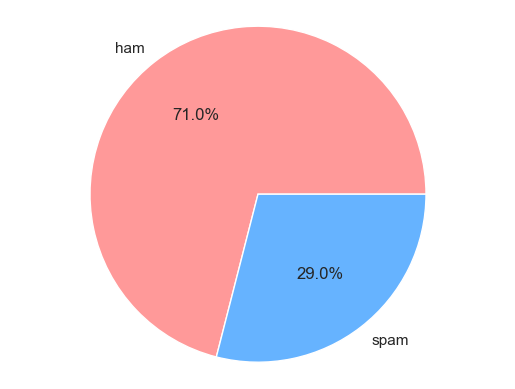

In [110]:
# lets check through pie chart
labels = dataset['label'].value_counts().index
sizes = dataset['label'].value_counts().values
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']  # Define custom colors

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

<Axes: xlabel='label'>

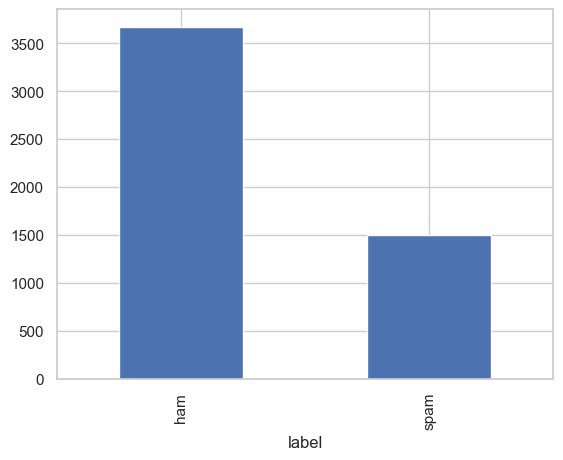

In [114]:
dataset['label'].value_counts().plot.bar()


In [122]:
# Checking value counts of target column
print("Value counts of label column:")
print(dataset['label'].value_counts())

Value counts of label column:
label
1    3672
0    1499
Name: count, dtype: int64


In [124]:
dataset['label'].value_counts()

label
1    3672
0    1499
Name: count, dtype: int64

In [126]:
# Convert 'label' column values into numerical
dataset.replace({'label': {'ham': 1, 'spam': 0}}, inplace=True)

In [128]:
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,1,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,0,"Subject: photoshop , windows , office . cheap ...",1
4,2030,1,Subject: re : indian springs\r\nthis deal is t...,0


In [130]:
#Drop the unimportant Columns
dataset.drop(['Unnamed: 0','label_num'],axis=1,inplace=True)

In [132]:
dataset.head()

,label,text
0,1,Subject: enron methanol ; meter # : 988291\r\n...
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,0,"Subject: photoshop , windows , office . cheap ..."
4,1,Subject: re : indian springs\r\nthis deal is t...


In [134]:
# Separating the data into feature and label
x = dataset['text']
y = dataset['label']

In [136]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [138]:
##Feature Extraction: Convert text into numerical values using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [140]:
x_train_features = tfidf_vectorizer.fit_transform(x_train)
x_test_features = tfidf_vectorizer.transform(x_test)

In [141]:
# Training the model
model = LogisticRegression()

In [142]:
# Fitting the model on the training data
model.fit(x_train_features, y_train)

LogisticRegression()

In [146]:
# Evaluating the model on testing data
test_prediction = model.predict(x_test_features)

In [148]:
test_accuracy = accuracy_score(test_prediction, y_test)

In [150]:
print('Accuracy for Testing is:', test_accuracy * 100)


Accuracy for Testing is: 98.93719806763285


In [162]:
# NLTK Library for Natural Language Processing
import nltk
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       tagge

True

In [164]:
#PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

# Precompute stopwords set
stop_words = set(stopwords.words('english'))


from nltk.stem import WordNetLemmatizer

# RE Library for Regular Expression
import re

#import the function for splitting the data into testing and training
from sklearn.model_selection import train_test_split

In [166]:
#import the models to use

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

#saving models
import joblib

<Axes: xlabel='label'>

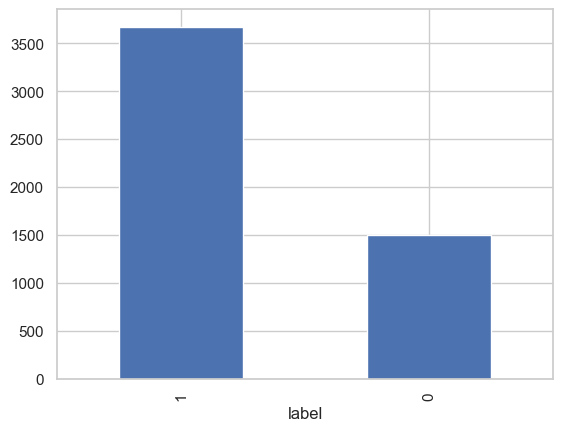

In [168]:
dataset['label'].value_counts().plot.bar()

Text preprocessing¶


In [173]:
# create a list text
text = list(dataset['text'])



# Initialize the WordNet Lemmatizer for lemmatization
st = PorterStemmer()

In [177]:
#List where we store the results
processed_text = []




for i in range(len(text)):

    a = re.sub('[^a-zA-Z]', ' ', text[i]) #remove  all non-alphabetic characteres

    a = a.lower() # lowercase

    a = a.split() #split into words

    a = [st.stem(word) for word in a if word not in stop_words] #remove stop words: is, and...

   # a = [st.stem(word) for word in a] #Converts each word to its base or root form (ex: "running" to "run").

    a = ' '.join(a) #  # Join the list of words back into a single string


    processed_text.append(a)

dataset['text']=processed_text
dataset.head()


,label,text
0,1,subject enron methanol meter follow note gave ...
1,1,subject hpl nom januari see attach file hplnol...
2,1,subject neon retreat ho ho ho around wonder ti...
3,0,subject photoshop window offic cheap main tren...
4,1,subject indian spring deal book teco pvr reven...


Splitting the dataset¶


In [180]:
X=dataset['text']
Y=dataset['label']

Vectorization

In [183]:
# Create an instance of CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(X)  # Transform the text data


Model Training and Evaluation¶


In [187]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_cv, Y, train_size=0.75, random_state=42)


I.1.Implementation of logistic regression¶


In [190]:
# Instantiate the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with training data
logreg.fit(X_train, Y_train)

LogisticRegression()

In [192]:
# Generate predictions
predictions = logreg.predict(X_test)
print(predictions)

[1 0 1 ... 1 1 1]


In [194]:
# Confusion Matrix and Accuracy for Logistic Regression
conf_matrix_logreg = confusion_matrix(Y_test, predictions)
# Confusion matrix as DataFrame for Logistic Regression
df_logreg = pd.DataFrame(conf_matrix_logreg, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Logistic Regression as DataFrame:")
print(df_logreg)

# Accuracy for Logistic Regression
accuracy_logreg = metrics.accuracy_score(Y_test, predictions)
print(f"\nAccuracy for Logistic Regression: {accuracy_logreg:.2f}")


Confusion Matrix for Logistic Regression as DataFrame:
      ham  spam
ham   350    13
spam   15   915

Accuracy for Logistic Regression: 0.98


In [196]:
# 2nd model: Random Forest
rd_frst = RandomForestClassifier()
rd_frst.fit(X_train, Y_train)


RandomForestClassifier()

In [198]:
# 3rd model: Decision Tree Classification
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)


DecisionTreeClassifier()

In [200]:
# Generate predictions
yrnd_pred = rd_frst.predict(X_test)  # fixed the variable name from rnd_clf to rd_frst
ydt_pred = decision_tree.predict(X_test)


In [202]:
# Confusion Matrix for Random Forest
cnf_matrix_rd = metrics.confusion_matrix(Y_test, yrnd_pred)
df_rd = pd.DataFrame(cnf_matrix_rd, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Logistic Regression as DataFrame:")
print(df_rd)



Confusion Matrix for Logistic Regression as DataFrame:
      ham  spam
ham   349    14
spam   19   911


In [204]:
# Accuracy for Random Forest
accuracy_rd = metrics.accuracy_score(Y_test, yrnd_pred)
print(f"Accuracy for Random Forest: {accuracy_rd:.2f}")


Accuracy for Random Forest: 0.97


In [206]:
# Confusion Matrix for Decision Tree
cnf_matrix_dt = metrics.confusion_matrix(Y_test, ydt_pred)

In [208]:
df_dt = pd.DataFrame(cnf_matrix_dt, index=['ham','spam'], columns=['ham','spam'])
print("\nConfusion Matrix for Decision tree as DataFrame:")
print(df_dt)


Confusion Matrix for Decision tree as DataFrame:
      ham  spam
ham   336    27
spam   42   888


In [210]:
# Accuracy for Decision Tree
accuracy_dt = metrics.accuracy_score(Y_test, ydt_pred)
print(f"Accuracy for Decision Tree: {accuracy_dt:.2f}")

Accuracy for Decision Tree: 0.95


In [212]:
# Save the models to files
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(rd_frst, 'random_forest_model.pkl')
joblib.dump(decision_tree, 'decision_tree_model.pkl')

print("\nModels saved to files successfully.")


Models saved to files successfully.


Training the Model¶
